In [87]:
import pandas as pd

# Skip the first header line, else errors for unknown columns
data = pd.read_csv('acc_players-2324F.csv', skiprows=1)

# Display the first 5 rows of the DataFrame after header ignored
data.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


In [77]:
total_points = data['PTS'].sum()
print(f"Total points scored by all players: {total_points}")

most_minutes_player = data.loc[data['MP'].idxmax()]['Player']
most_minutes = data['MP'].max()
print(f"Player with most minutes played: {most_minutes_player} ({most_minutes} minutes)")

top_5_rebounds = data.nlargest(5, 'TRB')[['Player', 'TRB']]
print("Top 5 players by total rebounds:")
print(top_5_rebounds)

Total points scored by all players: 38411
Player with most minutes played: Casey Morsell (1333 minutes)
Top 5 players by total rebounds:
              Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


In [78]:
# Contains only players who played more than 500 minutes
players_500_minutes = data[data['MP'] > 500]

top_assist_player = players_500_minutes.loc[players_500_minutes['AST'].idxmax()]['Player']
top_assists = players_500_minutes['AST'].max()
print(f"Player with the highest assists (over 500 minutes played): {top_assist_player} ({top_assists} assists, MY GOAT!!!)")

top_3_assist_leaders = players_500_minutes.nlargest(3, 'AST')[['Player', 'AST']]
print("Top 3 Assist Leaders:")
print(top_3_assist_leaders)

top_3_shot_blockers = players_500_minutes.nlargest(3, 'BLK')[['Player', 'BLK']]
print("Top 3 Shot Blockers:")
print(top_3_shot_blockers)


Player with the highest assists (over 500 minutes played): Reece Beekman (212 assists, MY GOAT!!!)
Top 3 Assist Leaders:
             Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150
Top 3 Shot Blockers:
            Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


In [89]:
# Grouped and calcualated the total points scored by each school
school_points = data.groupby('School')['PTS'].sum().sort_values(ascending=False)
print("Total points scored by each school:")
print(school_points)

# Same thing; total assists by each school
school_assists = data.groupby('School')['AST'].sum().sort_values(ascending=False)
print("Total assists by each school:")
print(school_assists)

top_3_schools_points = school_points.head(3)
print("Top 3 schools by total points scored:")
print(top_3_schools_points)


Total points scored by each school:
School
NC State          3101
North Carolina    3032
Duke              2830
Clemson           2785
Wake Forest       2733
Boston College    2667
Virginia Tech     2547
Florida State     2526
Pittsburgh        2495
Syracuse          2442
Miami (FL)        2424
Louisville        2304
Georgia Tech      2272
Virginia          2140
Notre Dame        2113
Name: PTS, dtype: int64
Total assists by each school:
School
Duke              551
NC State          536
North Carolina    536
Clemson           533
Virginia Tech     514
Boston College    509
Virginia          509
Miami (FL)        454
Pittsburgh        452
Syracuse          442
Wake Forest       429
Georgia Tech      425
Florida State     406
Louisville        356
Notre Dame        335
Name: AST, dtype: int64
Top 3 schools by total points scored:
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


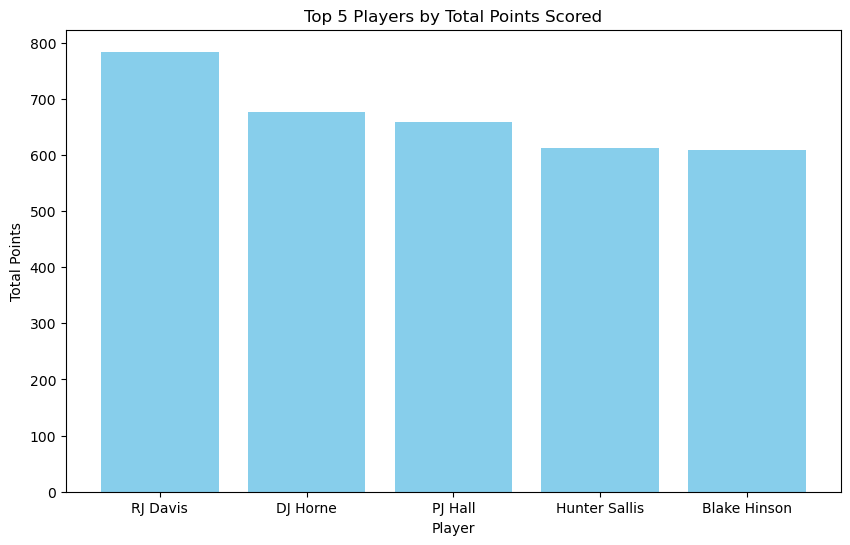

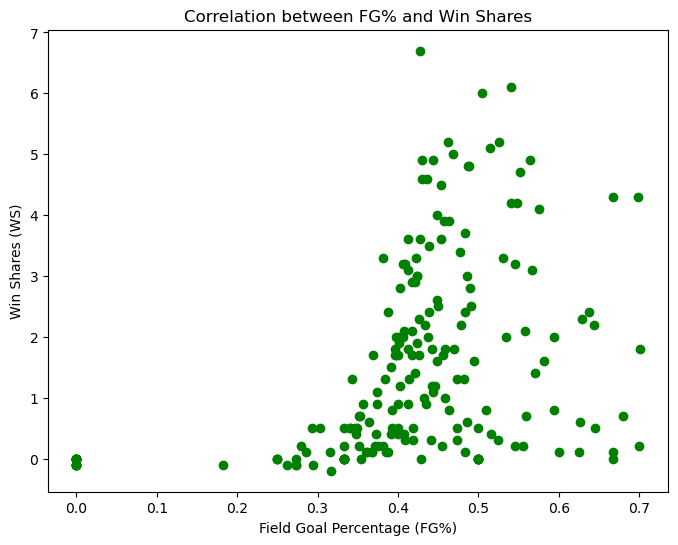

Correlation coefficient between FG% and Win Shares: 0.421066389419978


In [95]:
import matplotlib.pyplot as plt

# Bar chart of top 5 players by total points scored
top_5_scorers = data.nlargest(5, 'PTS')[['Player', 'PTS']]
plt.figure(figsize=(10, 6))
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'], color='skyblue')
plt.title('Top 5 Players by Total Points Scored')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.show()

# Correlation between FG% and WS
# https://www.w3schools.com/python/matplotlib_scatter.asp
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.figure(figsize=(8, 6))
plt.scatter(data['FG%'], data['WS'], color='green')
plt.title('Correlation between FG% and Win Shares')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.show()


# Calculate the correlation coefficient
# https://realpython.com/numpy-scipy-pandas-correlation-python/
correlation_coefficient = data['FG%'].corr(data['WS'])
print(f"Correlation coefficient between FG% and Win Shares: {correlation_coefficient}")
